In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ss = pd.read_csv('../data/lish-moa/sample_submission.csv')
train_feat = pd.read_csv('../data/lish-moa/train_features.csv')
train_target_scored = pd.read_csv('../data/lish-moa/train_targets_scored.csv')
train_target_nonscored = pd.read_csv('../data/lish-moa/train_targets_nonscored.csv')
test_feat = pd.read_csv('../data/lish-moa/test_features.csv')

In [3]:
print(ss.shape)
print(train_feat.shape)
print(train_target_scored.shape)
print(train_target_nonscored.shape)
print(test_feat.shape)

(3982, 207)
(23814, 876)
(23814, 207)
(23814, 403)
(3982, 876)


In [4]:
train_target_nonscored.head()

,sig_id,abc_transporter_expression_enhancer,abl_inhibitor,ace_inhibitor,acetylcholine_release_enhancer,adenosine_deaminase_inhibitor,adenosine_kinase_inhibitor,adenylyl_cyclase_inhibitor,age_inhibitor,alcohol_dehydrogenase_inhibitor,...,ve-cadherin_antagonist,vesicular_monoamine_transporter_inhibitor,vitamin_k_antagonist,voltage-gated_calcium_channel_ligand,voltage-gated_potassium_channel_activator,voltage-gated_sodium_channel_blocker,wdr5_mll_interaction_inhibitor,wnt_agonist,xanthine_oxidase_inhibitor,xiap_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train_target_scored.head()

,sig_id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
len(train_target_scored.columns)

207

## column wise analysis [ones count]

In [7]:
num_ones = []
for i in range(train_target_scored.shape[1]):
    num_ones.append(train_target_scored.iloc[:,i].value_counts()[1])

In [8]:
op_one_count_dict = dict(list(zip(list(train_target_scored.columns),num_ones)))

In [9]:
op_one_count_dict

{'sig_id': 1,
 '5-alpha_reductase_inhibitor': 17,
 '11-beta-hsd1_inhibitor': 18,
 'acat_inhibitor': 24,
 'acetylcholine_receptor_agonist': 190,
 'acetylcholine_receptor_antagonist': 301,
 'acetylcholinesterase_inhibitor': 73,
 'adenosine_receptor_agonist': 54,
 'adenosine_receptor_antagonist': 96,
 'adenylyl_cyclase_activator': 12,
 'adrenergic_receptor_agonist': 270,
 'adrenergic_receptor_antagonist': 360,
 'akt_inhibitor': 66,
 'aldehyde_dehydrogenase_inhibitor': 7,
 'alk_inhibitor': 42,
 'ampk_activator': 12,
 'analgesic': 12,
 'androgen_receptor_agonist': 48,
 'androgen_receptor_antagonist': 89,
 'anesthetic_-_local': 80,
 'angiogenesis_inhibitor': 36,
 'angiotensin_receptor_antagonist': 37,
 'anti-inflammatory': 73,
 'antiarrhythmic': 6,
 'antibiotic': 43,
 'anticonvulsant': 12,
 'antifungal': 13,
 'antihistamine': 12,
 'antimalarial': 18,
 'antioxidant': 73,
 'antiprotozoal': 36,
 'antiviral': 23,
 'apoptosis_stimulant': 49,
 'aromatase_inhibitor': 47,
 'atm_kinase_inhibitor': 6,

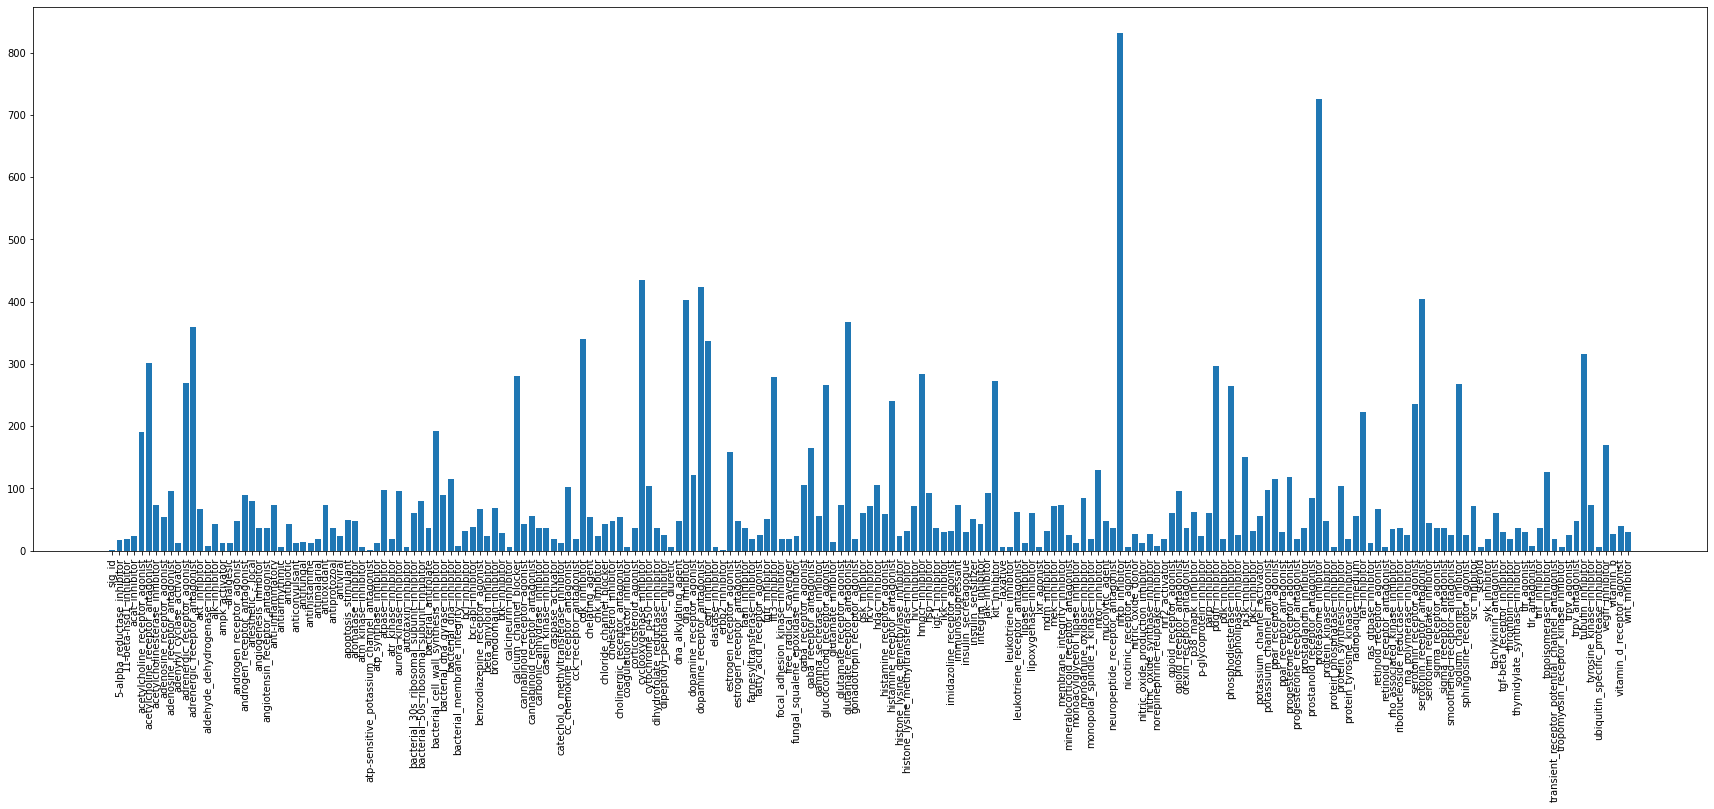

In [10]:
plt.figure(figsize=(30,10))
plt.bar(list(train_target_scored.columns),num_ones)
plt.xticks(rotation=90)
plt.show()

In [11]:
np.mean(num_ones)

81.3768115942029

In [12]:
np.median(num_ones)

38.0

In [13]:
np.max(num_ones)

832

In [14]:
np.min(num_ones)

1

In [15]:
np.std(num_ones)

114.73941509063621

In [16]:
np.sum(np.array(num_ones)<5)

3

In [17]:
sorted_op_one_count_dict = {k:v for k, v in sorted(op_one_count_dict.items(),key=lambda item: item[1])}

In [18]:
sorted_op_one_count_dict

{'sig_id': 1,
 'atp-sensitive_potassium_channel_antagonist': 1,
 'erbb2_inhibitor': 1,
 'antiarrhythmic': 6,
 'atm_kinase_inhibitor': 6,
 'autotaxin_inhibitor': 6,
 'calcineurin_inhibitor': 6,
 'coagulation_factor_inhibitor': 6,
 'diuretic': 6,
 'elastase_inhibitor': 6,
 'laxative': 6,
 'leukotriene_inhibitor': 6,
 'lxr_agonist': 6,
 'nicotinic_receptor_agonist': 6,
 'protein_phosphatase_inhibitor': 6,
 'retinoid_receptor_antagonist': 6,
 'steroid': 6,
 'tropomyosin_receptor_kinase_inhibitor': 6,
 'ubiquitin_specific_protease_inhibitor': 6,
 'aldehyde_dehydrogenase_inhibitor': 7,
 'bacterial_membrane_integrity_inhibitor': 7,
 'norepinephrine_reuptake_inhibitor': 7,
 'tlr_antagonist': 7,
 'adenylyl_cyclase_activator': 12,
 'ampk_activator': 12,
 'analgesic': 12,
 'anticonvulsant': 12,
 'antihistamine': 12,
 'atp_synthase_inhibitor': 12,
 'catechol_o_methyltransferase_inhibitor': 12,
 'lipase_inhibitor': 12,
 'monoacylglycerol_lipase_inhibitor': 12,
 'nitric_oxide_production_inhibitor': 

In [19]:
cumsum_one_count = np.cumsum(sorted(num_ones))

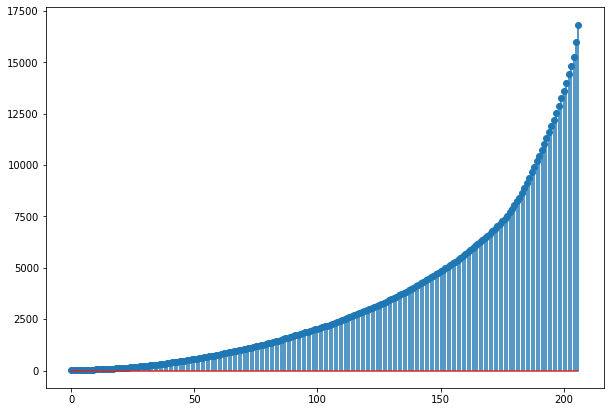

In [20]:
plt.figure(figsize=(10,7))
plt.stem(cumsum_one_count)
plt.show()

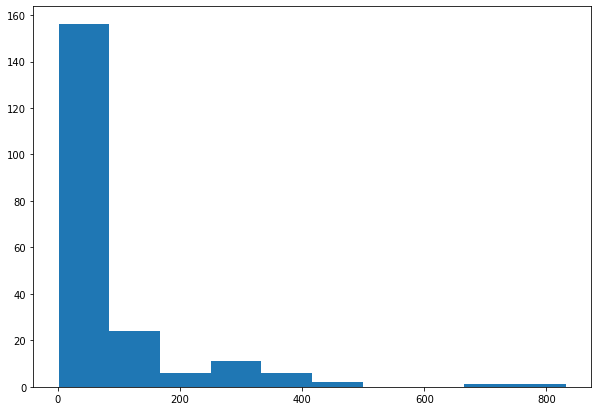

In [34]:
plt.figure(figsize=(10,7))
plt.hist(num_ones,bins=10)
plt.show()

In [22]:
freq,bins = np.histogram(num_ones,bins=15)
freq

array([129,  42,   9,   3,   8,   6,   4,   4,   0,   0,   0,   0,   0,
         1,   1])

In [23]:
bins

array([  1. ,  56.4, 111.8, 167.2, 222.6, 278. , 333.4, 388.8, 444.2,
       499.6, 555. , 610.4, 665.8, 721.2, 776.6, 832. ])

## rows-wise analysis [all zero]

In [24]:
row_sum = []
for i in range(train_target_scored.shape[0]):
    row_sum.append(np.sum(train_target_scored.iloc[i,1:]))

In [25]:
row_sum

[1,
 0,
 3,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 2,
 1,
 1,
 0,
 1,
 2,
 1,
 4,
 1,
 1,
 2,
 1,
 1,
 1,
 0,
 2,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 0,
 2,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 2,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 3,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 2,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 2,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 2,
 0,
 0,
 2,


In [26]:
row_sum.count(0)

9367

In [27]:
len(row_sum)

23814

In [32]:
np.max(row_sum)

7

In [28]:
row_sum.count(0)/len(row_sum)

0.3933400520702108

In [33]:
for i in range(10):
    print(str(i) + " : "+str(row_sum.count(i)))

0 : 9367
1 : 12532
2 : 1538
3 : 303
4 : 55
5 : 13
6 : 0
7 : 6
8 : 0
9 : 0


In [31]:
23814 / 100

238.14